<a href="https://colab.research.google.com/github/maxindian/Natural-Language-Processing/blob/master/PCA_mxd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

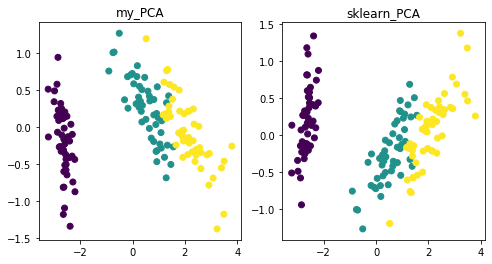

In [0]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

'''
Authour Xindian Ma
'''
def pca(data,n_dim):
  '''
  pca is o(D^3)
  '''
  data = data-np.mean(data, axis=0, keepdims = True)
  cov = np.dot(data.T, data)
  eig_values, eig_vector = np.linalg.eig(cov)
  # print(eig_values)
  indexs_ = np.argsort(-eig_values)[:n_dim]
  picked_eig_values = eig_values[indexs_]
  picked_eig_vector = eig_vector[:,indexs_]
  data_ndim = np.dot(data,picked_eig_vector)
  return data_ndim 

# data 降维的矩阵（n_samples, n_features）
# n_dim 目标维度
# fit n_features >> n_samples, reduce cal

def highdim_pca(data, n_dim):
  '''
  when n_feature(D)>> n_samples(N), highdim_pca is O(N^3)
  '''
  N = data.shape[0]
  data = np.dot(data,data.T)

  Neig_values, Neig_vector = np.linalg.eig(Ncov)
  indexs_ = np.argsort(-Neig_values)[:n_dim]
  Npicked_eig_values = Neig_values[indexs_]
  Npicked_eig_vector = Neig_vector[:,indexs_]
  
  picked_eig_vector = np.dot(data.T, Npicked_eig_vector)
  picked_eig_vector = picked_eig_vector/(N*Npicked_eig_values.reshape(-1,n_dim))**0.5

  data_ndim = np.dot(data, picked_eig_vector)
  return data_ndim

if __name__ =="__main__":
  data = load_iris()
  X = data.data
  Y = data.target
  data_2d1 = pca(X,2)
  plt.figure(figsize=(8,4))
  plt.subplot(121)
  plt.title("my_PCA")
  plt.scatter(data_2d1[:,0], data_2d1[:,1], c=Y)

  sklearn_pca = PCA(n_components=2)
  data_2d2 = sklearn_pca.fit_transform(X)
  plt.subplot(122)
  plt.title("sklearn_PCA")
  plt.scatter(data_2d2[:,0],data_2d2[:,1], c=Y)
  plt.show()
  